In [1]:
# Explain Logistic Regression, How it is different from linear regression:
#ANS-logistic regression is the classification algorithm which we use when our target variable 
#is discreate or categorical to find a relationship between features and probability
#of particular outcome.
#linear regression is used when our dependent variable is continuous while logistic regression is 
#used when our dependent variable isdiscreate or cayegorical

In [2]:
# Explain Sigmoid function:
#Sigmoid function is a S shapes curve which is used to mark probability of an outcome.
#it ranges from 0-1.it is also known as logistic responce function .

In [3]:
# Write assumptions of Logistic regression:
#There is No Multicollinearity Among independant variables
#There are No Extreme Outliers
#Only the meaningful variables should be included.
#sample size is sufficently large.


In [4]:
# import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [5]:
# read dataset : weatherAUS.csv
df=pd.read_csv("C:\\Users\\gverm\\Downloads\\weatherAUS.csv")

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
# Find summary of ur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
df=df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
# Extract Year, month and Day form 'date' column

year=df['Date'].dt.year
month=df['Date'].dt.month
Date=df['Date'].dt.day


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

In [14]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

C:\Users\gverm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

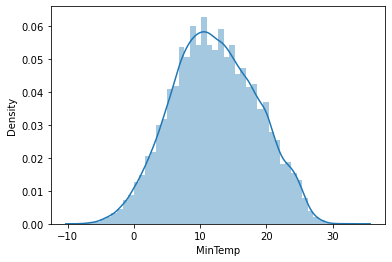

In [15]:
#filling null
sns.distplot(df['MinTemp'])

In [16]:
me=df['MinTemp'].median()
me

12.0

In [17]:
df['MinTemp'].fillna(me,inplace=True)
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
me=df['MaxTemp'].median()
me
df['MaxTemp'].fillna(me,inplace=True)
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [19]:
#outliers in rainfall
#using percentile method to dect outlier 
max_thresold=df['Rainfall'].quantile(0.99)
max_thresold

37.4

In [20]:
df[df['Rainfall']>max_thresold]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
431,2010-02-05,Albury,19.2,26.1,52.2,SE,33.0,S,SSW,9.0,13.0,83.0,70.0,1009.9,1009.4,22.1,25.0,Yes,Yes
462,2010-03-08,Albury,18.1,25.5,66.0,NW,56.0,N,NNW,11.0,37.0,79.0,38.0,1008.7,1007.5,19.8,24.1,Yes,Yes
699,2010-10-31,Albury,13.8,18.7,50.8,NNW,52.0,N,NNW,17.0,22.0,78.0,67.0,1011.3,1012.0,15.5,17.6,Yes,Yes
713,2010-11-14,Albury,19.2,22.6,52.6,N,26.0,WNW,WNW,15.0,15.0,93.0,73.0,1013.9,1013.2,19.2,22.1,Yes,Yes
796,2011-02-05,Albury,20.4,23.0,99.2,NW,28.0,NE,NW,11.0,4.0,97.0,95.0,1008.6,1007.3,22.5,22.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144949,2016-02-01,Uluru,23.4,37.5,58.4,NaN,NaN,NaN,NaN,NaN,NaN,78.0,34.0,1002.3,998.5,27.9,36.6,Yes,NaN
145046,2016-05-08,Uluru,16.3,21.9,39.0,W,35.0,SW,W,11.0,22.0,79.0,40.0,1008.8,1006.0,16.5,20.1,Yes,No
145095,2016-06-26,Uluru,10.2,15.6,42.0,SSW,43.0,SSW,SSW,19.0,24.0,95.0,52.0,1018.7,1018.4,10.5,14.9,Yes,No
145278,2016-12-26,Uluru,22.1,27.4,83.8,ENE,72.0,N,NNW,31.0,43.0,100.0,100.0,994.6,989.2,22.2,24.2,Yes,Yes


In [21]:
df1 =df[df['Rainfall'] < max_thresold]

df1

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [22]:
df1.Rainfall.value_counts()

0.0     91080
0.2      8761
0.4      3782
0.6      2592
0.8      2056
        ...  
9.9         1
20.7        1
18.5        1
11.9        1
21.5        1
Name: Rainfall, Length: 272, dtype: int64

C:\Users\gverm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

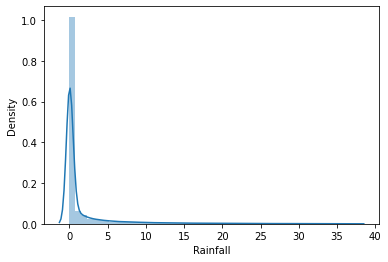

In [23]:

sns.distplot(df1['Rainfall'])


In [24]:
me=df1['Rainfall'].median()
me

0.0

In [25]:
df1['Rainfall'].fillna(me,inplace=True)


C:\Users\gverm\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
df1.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9617
WindGustSpeed     9557
WindDir9am        9723
WindDir3pm        3753
WindSpeed9am      1070
WindSpeed3pm      2612
Humidity9am       1527
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [27]:
df1['WindGustDir'].value_counts()
mo=df1['WindGustDir'].mode()
mo
df1['WindGustDir'].fillna(mo[0],inplace=True)


In [28]:
df1.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed     9557
WindDir9am        9723
WindDir3pm        3753
WindSpeed9am      1070
WindSpeed3pm      2612
Humidity9am       1527
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

C:\Users\gverm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

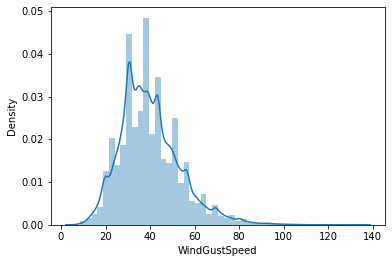

In [29]:
sns.distplot(df1['WindGustSpeed'])

In [30]:
me=df1['WindGustSpeed'].median()
me
df1['WindGustSpeed'].fillna(me,inplace=True)
df1.isnull().sum()


C:\Users\gverm\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am        9723
WindDir3pm        3753
WindSpeed9am      1070
WindSpeed3pm      2612
Humidity9am       1527
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [31]:
mo=df1['WindDir9am'].mode()

In [32]:
mo=df1['WindDir9am'].mode()
df1['WindDir9am'].fillna(mo[0],inplace=True)
df1.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm        3753
WindSpeed9am      1070
WindSpeed3pm      2612
Humidity9am       1527
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [33]:
mo=df1['WindDir3pm'].mode()
df1['WindDir3pm'].fillna(mo[0],inplace=True)
df1.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1070
WindSpeed3pm      2612
Humidity9am       1527
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

C:\Users\gverm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

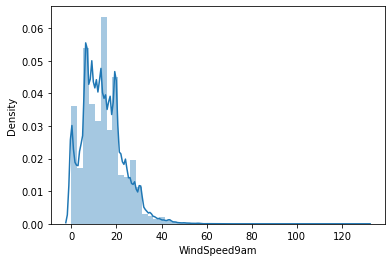

In [34]:
sns.distplot(df1['WindSpeed9am'])

In [35]:
me=df1['WindSpeed9am'].median()
df1['WindSpeed9am'].fillna(me,inplace=True)
df1.isnull().sum()


C:\Users\gverm\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm      2612
Humidity9am       1527
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [36]:
me=df1['WindSpeed3pm'].median()
df1['WindSpeed3pm'].fillna(me,inplace=True)
df1.isnull().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       1527
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [37]:
df1['Humidity9am'].value_counts()

99.0    3290
65.0    2968
70.0    2963
69.0    2962
68.0    2950
        ... 
4.0       20
3.0       10
2.0        8
1.0        5
0.0        1
Name: Humidity9am, Length: 101, dtype: int64

In [38]:
me=df1['Humidity9am'].median()
df1['Humidity9am'].fillna(me,inplace=True)
df1.isnull().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm       3570
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [39]:
me=df1['Humidity3pm'].median()
df1['Humidity3pm'].fillna(me,inplace=True)
df1.isnull().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      13798
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [40]:
df1['Pressure9am'].value_counts()
me=df1['Pressure9am'].median()
df1['Pressure9am'].fillna(me,inplace=True)
df1.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm      13849
Temp9am            668
Temp3pm           2694
RainToday            0
RainTomorrow      1394
dtype: int64

In [41]:
df1['Pressure3pm'].value_counts()
me=df1['Pressure3pm'].median()
df1['Pressure3pm'].fillna(me,inplace=True)
df1.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am           668
Temp3pm          2694
RainToday           0
RainTomorrow     1394
dtype: int64

In [42]:
df1['Temp9am'].value_counts()
me=df1['Temp9am'].median()
df1['Temp9am'].fillna(me,inplace=True)
df1.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm          2694
RainToday           0
RainTomorrow     1394
dtype: int64

In [43]:
df1['Temp3pm'].value_counts()
me=df1['Temp3pm'].median()
df1['Temp3pm'].fillna(me,inplace=True)
df1.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     1394
dtype: int64

In [44]:
df1['RainTomorrow'].value_counts()

No     109183
Yes     30187
Name: RainTomorrow, dtype: int64

In [45]:
mo=df1['RainTomorrow'].mode()
df1['RainTomorrow'].fillna(mo[0],inplace=True)
df1.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140764 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140764 non-null  datetime64[ns]
 1   Location       140764 non-null  object        
 2   MinTemp        140764 non-null  float64       
 3   MaxTemp        140764 non-null  float64       
 4   Rainfall       140764 non-null  float64       
 5   WindGustDir    140764 non-null  object        
 6   WindGustSpeed  140764 non-null  float64       
 7   WindDir9am     140764 non-null  object        
 8   WindDir3pm     140764 non-null  object        
 9   WindSpeed9am   140764 non-null  float64       
 10  WindSpeed3pm   140764 non-null  float64       
 11  Humidity9am    140764 non-null  float64       
 12  Humidity3pm    140764 non-null  float64       
 13  Pressure9am    140764 non-null  float64       
 14  Pressure3pm    140764 non-null  float64       
 15  

In [47]:
#One hot encoding to change every data to numeric
df2=pd.get_dummies(df1,columns=['Location'])
df2

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,2008-12-01,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,0,0,0,0,0,0,0,0,0,0
1,2008-12-02,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,0,0,0,0,0,0,0,0,0,0
2,2008-12-03,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,0,0,0,0,0,0,0,0,0,0
3,2008-12-04,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,0,0,1,0,0,0,0,0,0,0
145456,2017-06-22,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,0,0,1,0,0,0,0,0,0,0
145457,2017-06-23,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,0,0,1,0,0,0,0,0,0,0
145458,2017-06-24,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
df3=pd.get_dummies(df2,columns=['WindGustDir'])
df3

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,13.4,22.9,0.6,44.0,W,WNW,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,44.0,NNW,WSW,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,46.0,W,WSW,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,24.0,SE,E,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,ENE,NW,7.0,20.0,82.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.4,0.0,31.0,SE,ENE,13.0,11.0,51.0,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,3.6,25.3,0.0,22.0,SE,N,13.0,9.0,56.0,...,1,0,0,0,0,0,0,0,0,0
145457,2017-06-23,5.4,26.9,0.0,37.0,SE,WNW,9.0,9.0,53.0,...,0,0,0,0,0,0,0,0,0,0
145458,2017-06-24,7.8,27.0,0.0,28.0,SSE,N,13.0,7.0,51.0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
df4=pd.get_dummies(df3,columns=['WindDir9am'])
df4

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,2008-12-01,13.4,22.9,0.6,44.0,WNW,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,44.0,WSW,4.0,22.0,44.0,25.0,...,1,0,0,0,0,0,0,0,0,0
2,2008-12-03,12.9,25.7,0.0,46.0,WSW,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,0,0
3,2008-12-04,9.2,28.0,0.0,24.0,E,11.0,9.0,45.0,16.0,...,0,0,0,1,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,NW,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.4,0.0,31.0,ENE,13.0,11.0,51.0,24.0,...,0,0,0,1,0,0,0,0,0,0
145456,2017-06-22,3.6,25.3,0.0,22.0,N,13.0,9.0,56.0,21.0,...,0,0,0,1,0,0,0,0,0,0
145457,2017-06-23,5.4,26.9,0.0,37.0,WNW,9.0,9.0,53.0,24.0,...,0,0,0,1,0,0,0,0,0,0
145458,2017-06-24,7.8,27.0,0.0,28.0,N,13.0,7.0,51.0,24.0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
df5=pd.get_dummies(df4,columns=['WindDir3pm'])


In [51]:
df5.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,1,0,0,0,0,0,0,0,0


In [52]:
le=LabelEncoder()



In [53]:
df5['RainToday']=le.fit_transform(df5['RainToday'])
df5

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,...,0,0,0,0,0,0,0,0,0,0
145457,2017-06-23,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,...,0,0,0,0,0,0,0,0,1,0
145458,2017-06-24,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df5['RainTomorrow']=le.fit_transform(df5['RainTomorrow'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140764 entries, 0 to 145459
Columns: 112 entries, Date to WindDir3pm_WSW
dtypes: datetime64[ns](1), float64(12), int32(2), uint8(97)
memory usage: 29.1 MB


In [55]:
#Drop the Date 
data=df5.drop('Date',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140764 entries, 0 to 145459
Columns: 111 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(12), int32(2), uint8(97)
memory usage: 28.1 MB


In [56]:
# Perform scaling using minmaxscaler()
scaleddf= MinMaxScaler().fit_transform(data)

In [57]:
#Declare feature vector and target variable
X=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']

In [58]:
# Split data into separate training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [59]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
101354,12.9,21.3,1.8,63.0,20.0,28.0,93.0,81.0,1002.3,1001.4,...,0,0,0,0,0,0,0,0,1,0
41031,16.8,20.4,0.0,52.0,35.0,35.0,46.0,53.0,1024.2,1024.4,...,0,0,0,0,0,1,0,0,0,0
29914,9.3,30.6,0.0,50.0,9.0,20.0,62.0,27.0,1021.3,1015.8,...,0,0,0,0,0,0,0,1,0,0
132757,10.3,17.3,0.0,41.0,11.0,15.0,54.0,30.0,1003.0,1005.0,...,0,0,0,0,0,1,0,0,0,0
57764,-0.7,8.7,0.0,54.0,22.0,35.0,98.0,78.0,1036.8,1033.1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y_train.head()

101354    1
41031     0
29914     0
132757    0
57764     0
Name: RainTomorrow, dtype: int32

In [61]:
# Train logistic regression model
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\gverm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# Predict results
pred_test=log_reg.predict(X_test)

In [63]:
# Check accuracy score
log_reg.score(X_test,y_test)

0.8400663035756571

In [64]:
# Make confusion Matrix
cm = confusion_matrix(y_test,pred_test)
cm

array([[31553,  1603],
       [ 5151,  3923]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

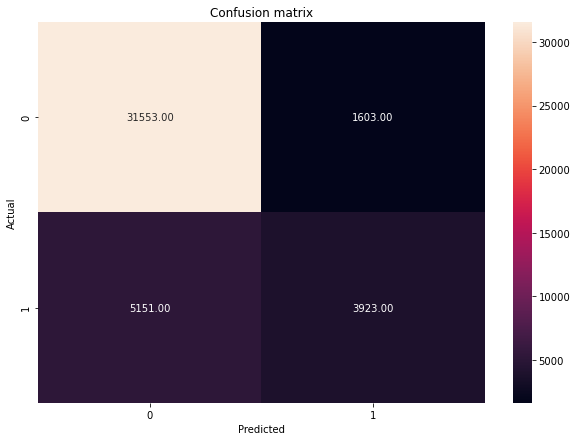

In [65]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='0.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')

In [66]:
# Generate Classification Report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33156
           1       0.71      0.43      0.54      9074

    accuracy                           0.84     42230
   macro avg       0.78      0.69      0.72     42230
weighted avg       0.83      0.84      0.82     42230



# Make all the obersvations
we have high precision, recall and f1-score for 0 but comparatively low score for 1 beacause,
here we have imbalanced data. Our model predicted 0 more accurately than 1 because it has more 
training data for 0 than for 1.
Also, false negative value of our model is quit high which means there is high type 1 error.Hence,this 
is not the Best model.we have to balance our data to get the best model.